In [ ]:
!pip install transformers
!pip install tensorflow

In [ ]:
from transformers import pipeline
import numpy as np
import csv
from datetime import datetime
from IPython.display import Image, display

In [ ]:
emotion_classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)


Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
goemotion_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

In [ ]:
emotion_verses = {
    'admiration': "You shine so bright, your light inspires,\nLifting others, lighting fires.",
    'amusement': "A giggle, a joke, a little play,\nLet joy and laughter lead the way.",
    'anger': "Take a breath, let fury fade,\nPeace begins where hate is laid.",
    'annoyance': "Let small storms gently pass,\nHold your calm like tempered glass.",
    'approval': "You’ve done so well, now take a bow,\nYour journey’s worth, you show it now.",
    'caring': "Kindness wraps the world in grace,\nA gentle heart, a healing place.",
    'confusion': "Waves of thought may cloud the mind,\nIn stillness, clarity you’ll find.",
    'curiosity': "Let questions bloom like stars above,\nDiscovery begins with love.",
    'desire': "Chase your dreams, don’t lose the fire,\nAmbition lifts you ever higher.",
    'disappointment': "When hopes fall short, just know this truth,\nEach setback holds a seed of youth.",
    'disapproval': "Stand your ground, yet choose with care,\nRespect grows strong in open air.",
    'disgust': "Let go what makes your spirit low,\nAnd let fresh winds within you blow.",
    'embarrassment': "Blushes fade, but courage stays,\nOwn your steps in brighter ways.",
    'excitement': "Your pulse is racing, dreams arise,\nToday’s the start of grander skies.",
    'fear': "You’re braver than you even know,\nKeep walking through that shadow’s glow.",
    'gratitude': "A thankful heart beats strong and true,\nWith every breath, life smiles on you.",
    'grief': "In quiet sorrow, memories gleam,\nLove still flows like a gentle stream.",
    'joy': "Let laughter echo through the air,\nA burst of light beyond compare!",
    'love': "In every heartbeat, love will stay,\nA light that never fades away.",
    'nervousness': "The unknown feels like shaky ground,\nBut calm is near when breath is found.",
    'optimism': "The sun may set but it will rise,\nHope is painted in morning skies.",
    'pride': "Stand tall and let your banner fly,\nYou’ve climbed your mountains, reached the sky.",
    'realization': "Truth breaks through like morning rays,\nAnd clears the fog of yesterdays.",
    'relief': "Like a breeze on weary days,\nPeace flows in the softest ways.",
    'remorse': "You’ve owned your part, and that takes might,\nNow let your spirit seek the light.",
    'sadness': "Tears will fall like healing rain,\nSoon you'll smile through less of pain.",
    'surprise': "Life’s full of twists that come and go,\nEach one a seed for you to grow.",
    'neutral': "Balance is peace in every way,\nA quiet strength that holds the day."
}

In [ ]:
emotion_video_links = {
    'admiration':   ("https://www.youtube.com/watch?v=TBuIGBCF9jc", "Inspiring speech"),
    'amusement':    ("https://www.youtube.com/watch?v=lLyc3HdUnSk", "Comedy sketch"),
    'anger':        ("https://www.youtube.com/watch?v=m4ocPioZX-k", "Anger talk"),
    'annoyance':    ("https://www.youtube.com/watch?v=0pVeXwB1S4k", "Annoyance insight"),
    'approval':     ("https://www.youtube.com/watch?v=DVLxhQ-HYoo", "Self-worth"),
    'caring':       ("https://www.youtube.com/watch?v=elW69hyPUuI", "Compassion talk"),
    'confusion':    ("https://www.youtube.com/watch?v=rhh29sUIXuY", "Clarity guidance"),
    'curiosity':    ("https://www.youtube.com/watch?v=5xBpkc7-w3A", "TED curiosity"),
    'desire':       ("https://www.youtube.com/watch?v=oAkQ4hX17N8", "Goal motivation"),
    'disappointment':("https://www.youtube.com/watch?v=UNQhuFL6CWg", "Overcoming setback"),
    'disapproval':  ("https://www.youtube.com/watch?v=H-uhyBiGIQo", "Confidence boost"),
    'disgust':      ("https://www.youtube.com/watch?v=BIak4VfjrjU", "Mental cleanse"),
    'embarrassment':("https://www.youtube.com/watch?v=mX9JxjU3E6A", "Confidence builder"),
    'excitement':   ("https://www.youtube.com/watch?v=FdOyMWPyZvU", "Roller-coaster thrill"),
    'fear':         ("https://www.youtube.com/watch?v=GVgMzKMgNxw", "Courage talk"),
    'gratitude':    ("https://www.youtube.com/watch?v=yA5Qpt1JRE4", "Thankful reflection"),
    'grief':        ("https://www.youtube.com/watch?v=nA-HsQF4PZw", "Healing support"),
    'joy':          ("https://www.youtube.com/watch?v=ZbZSe6N_BXs", "Happy song"),
    'love':         ("https://www.youtube.com/watch?v=llsFOx98JrU", "Love speech"),
    'nervousness':  ("https://www.youtube.com/watch?v=k2pLT1Z5MOs", "Calming meditation"),
    'optimism':     ("https://www.youtube.com/watch?v=mgmVOuLgFB0", "Positive mindset"),
    'pride':        ("https://www.youtube.com/watch?v=BbEVumEOwoE", "Self-belief"),
    'realization':  ("https://www.youtube.com/watch?v=hVCBrkrFrBE", "Insight talk"),
    'relief':       ("https://www.youtube.com/watch?v=EO_BnsrWMnM", "Peace moment"),
    'remorse':      ("https://www.youtube.com/watch?v=VZt7J0iaUD0", "Letting go"),
    'sadness':      ("https://www.youtube.com/watch?v=mejFtEY5faU", "Lift spirits"),
    'surprise':     ("https://www.youtube.com/watch?v=Gv9_4yMHFhI", "Unexpected growth"),
    'neutral':      ("https://www.youtube.com/watch?v=36m1o-tM05g", "Mindfulness calm")
}

In [ ]:
psychologists = [
    {
        "name": "Dr. Meera Sharma",
        "specialty": "Depression, Anxiety",
        "location": "Bangalore",
        "about": "Helps young adults cope with anxiety, stress, and academic pressure. Uses CBT and mindfulness."
    },
    {
        "name": "Dr. Arjun Menon",
        "specialty": "Grief Counseling, Loss",
        "location": "Mumbai",
        "about": "Experienced in helping individuals recover from loss and traumatic events. Offers support-based therapy."
    },
    {
        "name": "Dr. Priya Nair",
        "specialty": "Youth Therapy, Peer Pressure",
        "location": "Chennai",
        "about": "Works closely with teenagers facing bullying, low self-esteem, and social anxiety."
    },
    {
        "name": "Dr. Rahul Desai",
        "specialty": "Addiction Recovery",
        "location": "Delhi",
        "about": "Specializes in addiction therapy — alcohol, digital, and substance recovery with a compassionate approach."
    },
    {
        "name": "Dr. Fatima Siddiqui",
        "specialty": "Marriage & Family Counseling",
        "location": "Hyderabad",
        "about": "Helps couples and families rebuild communication and heal emotional wounds."
    },
    {
        "name": "Dr. Anika Verma",
        "specialty": "Panic Disorders, OCD",
        "location": "Pune",
        "about": "Expert in exposure therapy for intrusive thoughts and irrational fears."
    },
    {
        "name": "Dr. Karthik Reddy",
        "specialty": "Men’s Mental Health, Workplace Stress",
        "location": "Vijayawada",
        "about": "Focuses on burnout, career anxiety, and male-specific mental health struggles."
    },
    {
        "name": "Dr. Shruti Mukherjee",
        "specialty": "Eating Disorders, Body Image",
        "location": "Kolkata",
        "about": "Supports people with food-related anxiety and body dysmorphia. Emphasizes self-acceptance."
    },
    {
        "name": "Dr. Ramesh Patil",
        "specialty": "Geriatric Therapy",
        "location": "Ahmedabad",
        "about": "Helps elderly clients with loneliness, memory loss, and emotional regulation."
    },
    {
        "name": "Dr. Ayesha Khan",
        "specialty": "Child Psychology, Trauma Recovery",
        "location": "Lucknow",
        "about": "Works with kids who’ve experienced trauma, helping them build trust and recover safely."
    }
]

In [ ]:
critical_keywords = [
    "sad", "hopeless", "empty", "worthless", "numb", "tired", "guilty", "anxious",
    "difficult", "dark", "heavy", "awful", "terrible", "alone", "trapped",
    "withdrawn", "meaningless", "depressed", "cry", "die", "death","lonely","given-up in life"
]

suggestion_keywords = [
    "unloved", "broken", "unhappy", "done with life", "normal", "fine",
    "not in a mood", "irritated", "fed-up"
]

game_links = [
    "https://www.skribbl.io/", "https://quickdraw.withgoogle.com/",
    "https://www.coolmathgames.com/0-worlds-hardest-game",
    "https://slither.io/", "https://agar.io/", "https://www.wordle.com/",
    "https://www.typingclub.com/", "https://www.puzzleprime.com/",
    "https://www.tetris.com/play-tetris", "https://geoguessr.com/"
]

meditation_link = "https://www.youtube.com/watch?v=inpok4MKVLM"


In [ ]:
def detect_emotions(text):
    text_lower = text.lower()
    keyword_map = {
        "sad": "sadness", "happy": "joy", "love": "love", "angry": "anger",
        "annoyed": "annoyance", "afraid": "fear", "scared": "fear",
        "excited": "excitement", "confused": "confusion", "thankful": "gratitude",
        "lonely": "grief", "nervous": "nervousness", "sorry": "remorse"
    }
    for keyword, mapped_emotion in keyword_map.items():
        if keyword in text_lower:
            return mapped_emotion
    results = emotion_classifier(text)[0]
    top_emotion = max(results, key=lambda x: x['score'])['label']
    return top_emotion.lower()

def generate_verse_and_video(emotion):
    verse = emotion_verses.get(emotion, "Your feelings matter. Breathe deeply, you're stronger than you think.")
    video_link, description = emotion_video_links.get(emotion, ("https://www.youtube.com/results?search_query=calm+music", "Calming music"))
    return verse, video_link, description



In [ ]:
import nltk
nltk.download('punkt_tab')
import random
from diffusers import StableDiffusionPipeline
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
#  Emotion Detection Model
emotion_analyzer = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [ ]:
#  User Initial Emotion Check
user_input = input("Hi, how are you feeling today?\n>>> ")
emotion_result = emotion_analyzer(user_input[:512])[0]
emotion = emotion_result['label']
score = round(emotion_result['score'], 4)
print(f"\n Emotion: {emotion}\n Confidence Score: {score}")

#  Keyword Extraction (very simple for now)
tokens = word_tokenize(user_input)
keywords = [word.lower() for word in tokens if word.isalpha() and len(word) > 4][:5]  # top 5 long words

#  Prompt Generation for Stable Diffusion
style_tags = [
    "in the style of surreal art",
    "digital painting",
    "cinematic lighting",
    "watercolor style",
    "futuristic landscape"
]
chosen_style = random.choice(style_tags)

prompt = f"A visual representation of {emotion}, showing themes of {', '.join(keywords)}, {chosen_style}"
print(f"\n Image Prompt: {prompt}")

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if tf.config.list_physical_devices('GPU') else "cpu")

image = pipe(prompt).images[0]
image.save("mood_image.png")
image.show()

def log_user_input(user_input, emotion, follow_up=None):
    entry = {
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'user_input': user_input,
        'emotion': emotion,
        'follow_up': follow_up,
        'score': score,
        'keywords': ', '.join(keywords),
        'prompt': prompt,
    }

try:
    df = pd.read_csv('journal_data.csv')
    df = pd.concat([df, pd.DataFrame([entry])], ignore_index=True)
except FileNotFoundError:
    df = pd.DataFrame([entry])

df.to_csv('journal_data.csv', index=False)
print("\n Journal entry logged!")



Hi, how are you feeling today?
>>> i had a boring day man

 Emotion: sadness
 Confidence Score: 0.9886

 Image Prompt: A visual representation of sadness, showing themes of boring, futuristic landscape


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


 Journal entry logged!


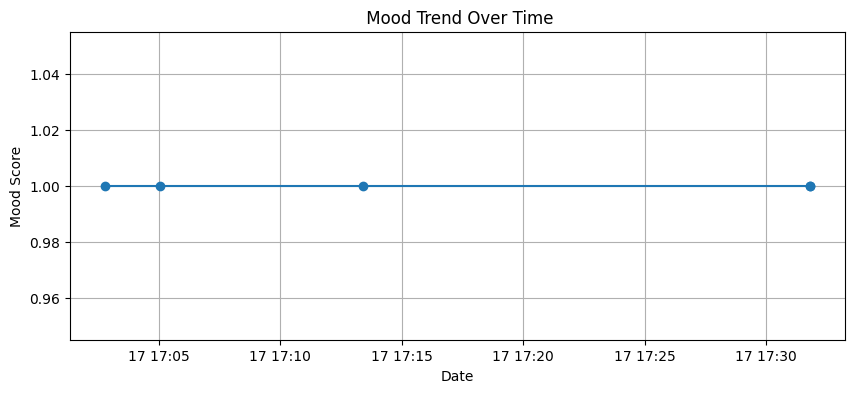

In [ ]:
#  Mood Visualization
plt.figure(figsize=(10,4))
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

emotion_map = {
    'joy': 1,
    'neutral': 0,
    'sadness': -1,
    'anger': -2,
    'fear': -1,
    'surprise': 0.5,
    'love': 1.2,
    'disgust': -1.5
}
df['emotion_value'] = df['emotion'].map(emotion_map).fillna(0)

plt.plot(df['timestamp'], df['emotion_value'], marker='o')
plt.title(" Mood Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Mood Score")
plt.grid(True)
plt.show()

In [ ]:
log_user_input(user_input, emotion)

verse, video_link, description = generate_verse_and_video(emotion)
print("\nVerse for You:\n", verse)
print("\nHere’s something for you to watch:")
print(f"{video_link}  ({description})")

#  Follow-Up
print("\nHow are you feeling after watching the video?")
print("1) I was feeling good from the beginning, I feel great now.")
print("2) I feel a lot lot better and happy.")
print("3) I feel so low and demotivated.")

follow_up = input("Please enter 1, 2, or 3: ").strip()

log_user_input(user_input, emotion, follow_up)

if follow_up == "1":
    print("\nGlad you feel that way! 😊")

elif follow_up == "2":
    print("\nSo glad you feel that way — happy to help you anytime! 💛")

elif follow_up == "3":
    print("\nI'm so sorry to hear that. 💔")
    print("🔹 Chatbox: Tell me more about your pain. I'm always here to help.")

    while True:
        user_msg = input("You: ").lower()
        if user_msg in ["bye", "stop", "quit", "exit"]:
            print("AI: I'm here whenever you need to talk. Please take care. 🌱")
            break
        elif any(word in user_msg for word in critical_keywords):
            print("\nAI: It sounds like you're really struggling. You’re not alone. ❤️")
            print("Please consider one of the following options for support:")
            print("1️⃣ Talk to a psychologist")
            print("2️⃣ Play a relaxing game")
            print("3️⃣ Try yoga/meditation")
            choice = input("Please enter 1, 2, or 3: ").strip()
            if choice == "1":
                print("\n🧠 Trusted Psychologists Near You:")
                for i, doc in enumerate(psychologists, 1):
                    print(f"\n{i}) Dr. {doc['name']}")
                    print(f"   🏥 Location: {doc['location']}")
                    print(f"   🧠 Specialty: {doc['specialty']}")
                    print(f"   📄 About: {doc['about']}")
            elif choice == "2":
                print("\n🎮 Here are some games to ease your mind:")
                for i, link in enumerate(game_links, 1):
                    print(f"{i}. {link}")
            elif choice == "3":
                print(f"\n🧘‍♀️ Try this calming meditation video: {meditation_link}")
            else:
                print("Invalid choice. Please select from 1, 2, or 3.")
        elif any(word in user_msg for word in suggestion_keywords):
            print("\nAI: You’re not alone. Many feel this way, and it’s okay to ask for support.")
            print("✨ Suggestion: Try writing down 3 things you like about yourself.")
            print("🎁 Here's a surprise GIF to brighten your day:")
            display(Image(url="https://media.giphy.com/media/5GoVLqeAOo6PK/giphy.gif"))

            print("\n🎮 Here are some games that might lift your spirits:")
            for i, link in enumerate(game_links, 1):
                print(f"{i}. {link}")
        else:
            print("AI: I'm listening — go on, share more 💬")
else:
    print("\nInvalid input. Please enter 1, 2, or 3.")


Verse for You:
 Tears will fall like healing rain,
Soon you'll smile through less of pain.

Here’s something for you to watch:
https://www.youtube.com/watch?v=mejFtEY5faU  (Lift spirits)

How are you feeling after watching the video?
1) I was feeling good from the beginning, I feel great now.
2) I feel a lot lot better and happy.
3) I feel so low and demotivated.
Please enter 1, 2, or 3: 3

I'm so sorry to hear that. 💔
🔹 Chatbox: Tell me more about your pain. I'm always here to help.
You: i wanted my day to be more interesting and joyful 
AI: I'm listening — go on, share more 💬
You: nothing much actually then - - - bye
AI: I'm listening — go on, share more 💬
You: bye
AI: I'm here whenever you need to talk. Please take care. 🌱
